## 1. Introduction
    Predicting house prices is a rapidly evolving and challenging task due to various market dynamics. Houston is currently a hot housing market, making it particularly interesting to analyze and predict home prices. I am planning to develop a model that exclusively employs supervised learning techniques to learn from historical data and accurately forecast home prices. This model will leverage insights from past transactions and relevant features to provide reliable predictions for prospective buyers and sellers.

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of housing prices data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/opashroanld/housing-houston-and-miami 

  *   #### Download data and load it to dataframe

In [39]:
# download the dataset from kaggle
!export KAGGLE_USERNAME='' # add kaggle username
!export KAGGLE_KEY='' # add kaggle key for the user
!curl -L -o housing-prices-dataset.zip\
https://www.kaggle.com/api/v1/datasets/download/opashroanld/housing-houston-and-miami
!unzip housing-prices-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1003k  100 1003k    0     0  1382k      0 --:--:-- --:--:-- --:--:-- 3087k
Archive:  housing-prices-dataset.zip
  inflating: Houston.csv             
  inflating: Miami.csv               


In [42]:
import pandas as pd
houston_home_prices_df=pd.read_csv('Houston.csv')

* ####  Perform EDA on the houston housing price data
  * check for any nuls missing values
  * Clean the data 

In [58]:
# print the information and head to see the data and types
houston_home_prices_df.info()
print(houston_home_prices_df.head())
print(houston_home_prices_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13546 entries, 0 to 13545
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       13192 non-null  float64
 1   Bedrooms    13192 non-null  float64
 2   Bathrooms   13192 non-null  float64
 3   Car         13192 non-null  float64
 4   sqm_house   13192 non-null  float64
 5   Balcony     13192 non-null  float64
 6   Year_built  13546 non-null  int64  
 7   Address     13546 non-null  object 
 8   Latitude    13546 non-null  float64
 9   Longitude   13546 non-null  float64
 10  Zipcode     13546 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.1+ MB
       Price  Bedrooms  Bathrooms  Car  sqm_house  Balcony  Year_built  \
0  1328655.0       9.0        4.0  6.0      470.0      3.0        1977   
1   826553.0       8.0        5.0  5.0      208.0      3.0        2002   
2  1133566.0       2.0        1.0  2.0      564.0      2.0        1982   


In [59]:
# check for nulls and any missing values 
houston_home_prices_df.isnull().sum()

Price         354
Bedrooms      354
Bathrooms     354
Car           354
sqm_house     354
Balcony       354
Year_built      0
Address         0
Latitude        0
Longitude       0
Zipcode         0
dtype: int64

In [71]:
# I want to drop the records for which the home price is null
cleaned_home_prices_df = houston_home_prices_df.dropna(subset=['Price'])


In [72]:
# check for nulls and any missing values 
cleaned_home_prices_df.isnull().sum()

Price           0
Bedrooms      325
Bathrooms     319
Car           314
sqm_house     333
Balcony       314
Year_built      0
Address         0
Latitude        0
Longitude       0
Zipcode         0
dtype: int64

In [83]:
# replace the missing values with a mean for Bedrooms,Bathrooms,Car,sqm_house,Balcony
# fill all floats with mean of total dataset
for column_name in ('Bedrooms','Bathrooms','Car','sqm_house','Balcony'):
    cleaned_home_prices_df[column_name].fillna(cleaned_home_prices_df[column_name].mean(), inplace=True)
cleaned_home_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13192 entries, 0 to 13544
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       13192 non-null  float64
 1   Bedrooms    13192 non-null  float64
 2   Bathrooms   13192 non-null  float64
 3   Car         13192 non-null  float64
 4   sqm_house   13192 non-null  float64
 5   Balcony     13192 non-null  float64
 6   Year_built  13192 non-null  int64  
 7   Address     13192 non-null  object 
 8   Latitude    13192 non-null  float64
 9   Longitude   13192 non-null  float64
 10  Zipcode     13192 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.2+ MB


In [84]:
# Now it is time to look at the categorical variable 
cleaned_home_prices_df['Address'].nunique()


13192

In [85]:
# address is unique for each record , so we drop that column
cleaned_home_prices_df.drop('Address', axis=1, inplace=True)

In [86]:
cleaned_home_prices_df.head()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
0,1328655.0,9.0,4.0,6.0,470.0,3.0,1977,29.799693,-95.396527,77001
1,826553.0,8.0,5.0,5.0,208.0,3.0,2002,29.735212,-95.435717,77001
2,1133566.0,2.0,1.0,2.0,564.0,2.0,1982,29.751218,-95.369976,77001
3,814179.0,8.0,5.0,4.0,216.0,3.0,1986,29.721105,-95.356369,77002
4,1020010.0,7.0,4.0,4.0,347.0,3.0,2003,29.783241,-95.362663,77005


In [89]:
# nw looks at the data 
cleaned_home_prices_df.describe()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
count,1.319200e+04,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000,13192.000000
mean,8.456761e+05,6.141525,3.441467,3.351685,317.523291,2.338096,1984.921847,29.749687,-95.399910,77002.980898
std,3.681237e+05,2.843307,1.540304,1.660847,171.829185,1.058444,20.447778,0.029004,0.028860,1.408229
min,5.040400e+04,1.000000,1.000000,0.000000,50.000000,0.000000,1950.000000,29.700002,-95.449994,77001.000000
25%,5.924685e+05,4.000000,2.000000,2.000000,191.000000,2.000000,1967.000000,29.724363,-95.425224,77002.000000
50%,8.411120e+05,6.000000,4.000000,3.351685,317.523291,2.000000,1985.000000,29.749352,-95.399677,77003.000000
75%,1.105588e+06,8.000000,4.000000,4.000000,439.000000,3.000000,2003.000000,29.774856,-95.375000,77004.000000
max,1.000000e+07,20.000000,10.000000,10.000000,10000.000000,10.000000,2020.000000,29.799998,-95.350000,77005.000000


In [ ]:
# car and Balcony having zero values , and it can be valid as missing the car , balcony 

## 3 Feature engineering

In [94]:
#Plot correlation matricx and it gives a bit of the relationship to target variable
cleaned_home_prices_df.corr()

,Price,Bedrooms,Bathrooms,Car,sqm_house,Balcony,Year_built,Latitude,Longitude,Zipcode
Price,1.000000,0.441199,0.474300,0.493081,0.685265,0.336265,-0.008009,0.011649,-0.005796,0.009393
Bedrooms,0.441199,1.000000,0.786511,0.750299,0.045729,0.584299,-0.012913,-0.001120,0.004230,0.001443
Bathrooms,0.474300,0.786511,1.000000,0.752490,0.051922,0.567866,-0.009927,-0.003956,-0.007248,-0.000261
Car,0.493081,0.750299,0.752490,1.000000,0.071663,0.536380,-0.020073,0.002327,-0.009636,0.002702
sqm_house,0.685265,0.045729,0.051922,0.071663,1.000000,0.060941,0.001441,0.014593,0.005117,0.017311
Balcony,0.336265,0.584299,0.567866,0.536380,0.060941,1.000000,-0.009777,0.001023,-0.000788,-0.006447
Year_built,-0.008009,-0.012913,-0.009927,-0.020073,0.001441,-0.009777,1.000000,-0.000620,0.008900,-0.008313
Latitude,0.011649,-0.001120,-0.003956,0.002327,0.014593,0.001023,-0.000620,1.000000,-0.030245,0.013997
Longitude,-0.005796,0.004230,-0.007248,-0.009636,0.005117,-0.000788,0.008900,-0.030245,1.000000,-0.003836
Zipcode,0.009393,0.001443,-0.000261,0.002702,0.017311,-0.006447,-0.008313,0.013997,-0.003836,1.000000


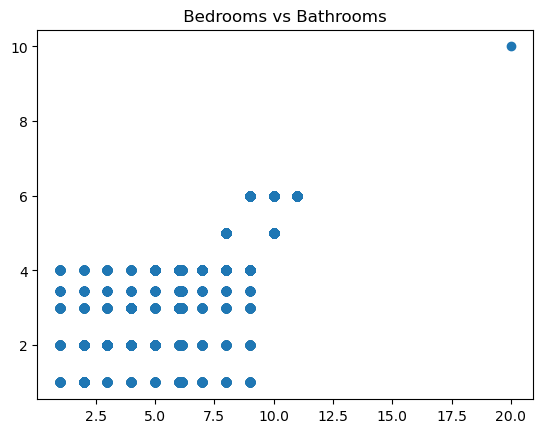

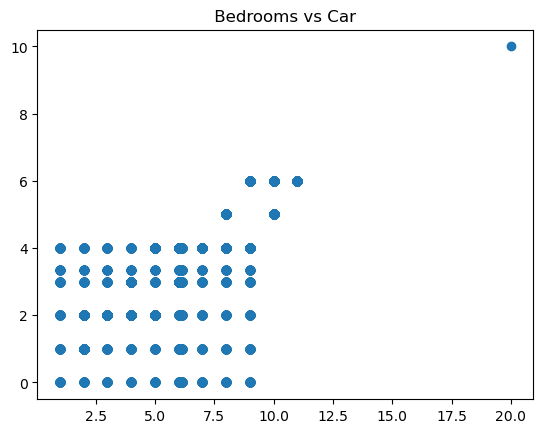

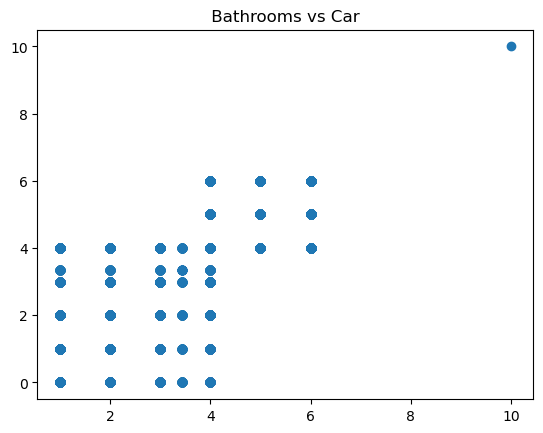

In [98]:
# bedroom bath room and car has hig correlation lets plot them and see
cols=('Bedrooms','Bathrooms','Car')
for idx in range(3):
  for idx1 in range(idx+1,3):
     column_name1 = cols[idx]
     column_name2 = cols[idx1]
     plt.scatter(cleaned_home_prices_df[column_name1], cleaned_home_prices_df[column_name2])
     plt.title(f' {column_name1} vs {column_name2} ')
     plt.show()

Text(0.5, 1.0, 'histogram of price')

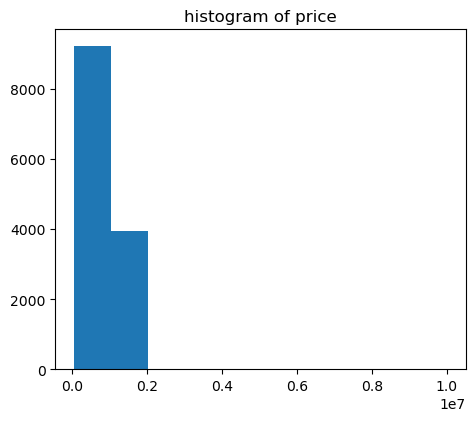

In [105]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(cleaned_home_prices_df["Price"])
plt.title("histogram of price")


In [102]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
jb_stats = jarque_bera(np.log(cleaned_home_prices_df["Price"]))
norm_stats = normaltest(np.log(cleaned_home_prices_df["Price"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 11075.331471735357 and p value is 0.0
Normality test statistics is 3893.917602862589 and p value is 0.0


In [112]:
# target is not in the normal distribution , either we cna do log/boxcox transformation
# or will add lasso/Ridge regression also there is multi collinarity
# select features and target variable and prepare the train and test datasets , selecting 25% for test dataset
# `Y` is the target variable
Y = cleaned_home_prices_df['Price']
# `X` is the feature set 
X = cleaned_home_prices_df.drop(['Price'], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 465)

In [114]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9894 entries, 1839 to 5721
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    9894 non-null   float64
 1   Bathrooms   9894 non-null   float64
 2   Car         9894 non-null   float64
 3   sqm_house   9894 non-null   float64
 4   Balcony     9894 non-null   float64
 5   Year_built  9894 non-null   int64  
 6   Latitude    9894 non-null   float64
 7   Longitude   9894 non-null   float64
 8   Zipcode     9894 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 773.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 3298 entries, 8510 to 527
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Bedrooms    3298 non-null   float64
 1   Bathrooms   3298 non-null   float64
 2   Car         3298 non-null   float64
 3   sqm_house   3298 non-null   float64
 4   Balcony     3298 non-null   float64
 5 

## 4. Working with models,training and tuning

* I will start with linear regession simple model and try to tune parameters and measure the model performance
* I will also try lasso ridge regression techniques and see if the performance improves.

* Next I will try with ensemble model random forest regression to compare the model 

In [129]:
# build regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
# Fit an OLS model using scikit-learn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# You are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)
def print_scores(X_train,y_train,X_test, y_test,y_preds_train,y_preds_test,regmodel):
 print("R-squared of the model on the training set is: {}".format(regmodel.score(X_train, y_train)))
 print("-----Test set statistics-----")
 print("R-squared of the model on the test set is: {}".format(regmodel.score(X_test, y_test)))
 print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
 print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
 print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
 print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

print_scores(X_train,y_train,X_test, y_test,y_preds_train,y_preds_test,lrm)

R-squared of the model on the training set is: 0.698888610917894
-----Test set statistics-----
R-squared of the model on the test set is: 0.6608948359225466
Mean absolute error of the prediction is: 119563.9703644414
Mean squared error of the prediction is: 50592169127.27052
Root mean squared error of the prediction is: 224927.0306727729
Mean absolute percentage error of the prediction is: 32.925925538851395


In [139]:
# try lasso 
from sklearn.linear_model import Lasso
# You are making predictions here
for alpha_val in (3,3.5,4,4.5,5):
  print(f" Lasso with alpha=10**{alpha_val}")
  lassoregr = Lasso(alpha=10**alpha_val)
  lassoregr.fit(X_train, y_train)
  print_scores(X_train,y_train,X_test, y_test,lassoregr.predict(X_train),lassoregr.predict(X_test),lassoregr)

 Lasso with alpha=10**3
R-squared of the model on the training set is: 0.6988650759694708
-----Test set statistics-----
R-squared of the model on the test set is: 0.6610019332961115
Mean absolute error of the prediction is: 119423.98260469956
Mean squared error of the prediction is: 50576190932.27247
Root mean squared error of the prediction is: 224891.50924895424
Mean absolute percentage error of the prediction is: 32.909202238691094
 Lasso with alpha=10**3.5
R-squared of the model on the training set is: 0.6987832714314001
-----Test set statistics-----
R-squared of the model on the test set is: 0.6611785547475284
Mean absolute error of the prediction is: 119182.66970940847
Mean squared error of the prediction is: 50549840220.787735
Root mean squared error of the prediction is: 224832.91623067058
Mean absolute percentage error of the prediction is: 32.89260119753194
 Lasso with alpha=10**4
R-squared of the model on the training set is: 0.6980642176446814
-----Test set statistics-----


### model with alpha 10 ** 4.5 looks better with 
```
R-squared of the model on the training set is: 0.6940875542524403
-----Test set statistics-----
R-squared of the model on the test set is: 0.6579172376622209
Mean absolute error of the prediction is: 118722.69663834843
Mean squared error of the prediction is: 51036406404.48598
Root mean squared error of the prediction is: 225912.3865671955
Mean absolute percentage error of the prediction is: 33.04179838173453```

In [140]:
#ridge
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Here, `alpha` is the regularization
# parameter (usually called `lambda`). As `alpha` gets larger, parameter
# shrinkage grows more pronounced.
for alpha_val in (3,3.5,4,4.5,5):
  print(f" ridgeregr with alpha=10**{alpha_val}")
  ridgeregr = Ridge(alpha=10**alpha_val)
  ridgeregr.fit(X_train, y_train)
  print_scores(X_train,y_train,X_test, y_test,ridgeregr.predict(X_train),ridgeregr.predict(X_test),ridgeregr)


 ridgeregr with alpha=10**3
R-squared of the model on the training set is: 0.6986898973918905
-----Test set statistics-----
R-squared of the model on the test set is: 0.6603750022929591
Mean absolute error of the prediction is: 119122.35702754177
Mean squared error of the prediction is: 50669724746.27057
Root mean squared error of the prediction is: 225099.36638353864
Mean absolute percentage error of the prediction is: 32.9213341840405
 ridgeregr with alpha=10**3.5
R-squared of the model on the training set is: 0.6975365677402153
-----Test set statistics-----
R-squared of the model on the test set is: 0.6588563069040307
Mean absolute error of the prediction is: 118687.09240634518
Mean squared error of the prediction is: 50896303702.030495
Root mean squared error of the prediction is: 225602.09152849292
Mean absolute percentage error of the prediction is: 32.96264805056316
 ridgeregr with alpha=10**4
R-squared of the model on the training set is: 0.6923900546465145
-----Test set statis

#### Ridge with alpha 10 ** 3.5 looks better with 
```
R-squared of the model on the training set is: 0.6975365677402153
-----Test set statistics-----
R-squared of the model on the test set is: 0.6588563069040307
Mean absolute error of the prediction is: 118687.09240634518
Mean squared error of the prediction is: 50896303702.030495
Root mean squared error of the prediction is: 225602.09152849292
Mean absolute percentage error of the prediction is: 32.96264805056316```

## Linear regression better model is with Ridge regression and alpha = 10 ** 3.5 and below are model performance
```
R-squared of the model on the training set is: 0.6975365677402153
-----Test set statistics-----
R-squared of the model on the test set is: 0.6588563069040307
Mean absolute error of the prediction is: 118687.09240634518
Mean squared error of the prediction is: 50896303702.030495
Root mean squared error of the prediction is: 225602.09152849292
Mean absolute percentage error of the prediction is: 32.96264805056316```

### Trying the RandomForestRegressor to predict the house price

In [158]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression
for n in range(50,200,10):
 print(f'running with {n} estimators')
 rf_model = RandomForestRegressor(n_estimators=n, random_state=200)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 50 estimators
R-squared of the model on the training set is: 0.9744409411717146
-----Test set statistics-----
R-squared of the model on the test set is: 0.7097956127994564
Mean absolute error of the prediction is: 75910.7007155852
Mean squared error of the prediction is: 43296507968.7561
Root mean squared error of the prediction is: 208078.12948206763
Mean absolute percentage error of the prediction is: 22.594911642974047
running with 60 estimators
R-squared of the model on the training set is: 0.9748452956714742
-----Test set statistics-----
R-squared of the model on the test set is: 0.7111387404538879
Mean absolute error of the prediction is: 75473.57215989489
Mean squared error of the prediction is: 43096122517.12967
Root mean squared error of the prediction is: 207596.05612132826
Mean absolute percentage error of the prediction is: 22.498526953437402
running with 70 estimators
R-squared of the model on the training set is: 0.9752567144821711
-----Test set statistics---

In [169]:
# the model performing better on training data but not on test data it is time to tune the overfit by tuning max_depth
for n in range(10,40,5):
 print(f'running with {n} depth')
 rf_model = RandomForestRegressor(
     n_estimators= 120,
     max_features= 9,
     max_depth=n,
     min_samples_split=2,
     min_samples_leaf=1,
     random_state=200)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 10 depth
R-squared of the model on the training set is: 0.9084616392407655
-----Test set statistics-----
R-squared of the model on the test set is: 0.7134052893370123
Mean absolute error of the prediction is: 79301.98537405347
Mean squared error of the prediction is: 42757968939.48594
Root mean squared error of the prediction is: 206780.00130449256
Mean absolute percentage error of the prediction is: 23.54754292780302
running with 15 depth
R-squared of the model on the training set is: 0.9668125119356192
-----Test set statistics-----
R-squared of the model on the test set is: 0.7144690971370489
Mean absolute error of the prediction is: 75358.49865825076
Mean squared error of the prediction is: 42599256098.04403
Root mean squared error of the prediction is: 206395.8722892588
Mean absolute percentage error of the prediction is: 22.484507384011952
running with 20 depth
R-squared of the model on the training set is: 0.9752310538223572
-----Test set statistics-----
R-squared of

In [170]:
# depth 15 looks better in terms of performance on test dataset , we will run depth between 15 and 20 and select the better model 
# the model performing better on training data but not on test data it is time to tune the overfit by tuning max_depth
for n in range(15,21,1):
 print(f'running with {n} depth')
 rf_model = RandomForestRegressor(
     n_estimators= 120,
     max_features= 9,
     max_depth=n,
     min_samples_split=2,
     min_samples_leaf=1,
     random_state=200)
 rf_model.fit(X_train, y_train)
 print_scores(X_train,y_train,X_test, y_test,rf_model.predict(X_train),rf_model.predict(X_test),rf_model)

running with 15 depth
R-squared of the model on the training set is: 0.9668125119356192
-----Test set statistics-----
R-squared of the model on the test set is: 0.7144690971370489
Mean absolute error of the prediction is: 75358.49865825076
Mean squared error of the prediction is: 42599256098.04403
Root mean squared error of the prediction is: 206395.8722892588
Mean absolute percentage error of the prediction is: 22.484507384011952
running with 16 depth
R-squared of the model on the training set is: 0.9703878673218677
-----Test set statistics-----
R-squared of the model on the test set is: 0.7136435650738859
Mean absolute error of the prediction is: 75308.00337932428
Mean squared error of the prediction is: 42722419830.667046
Root mean squared error of the prediction is: 206694.02466125393
Mean absolute percentage error of the prediction is: 22.455057760469145
running with 17 depth
R-squared of the model on the training set is: 0.9727758349633784
-----Test set statistics-----
R-squared 

#### Random Forest model
  It is interesting that the increase in estimators is improving the performance of the model, but the improvement is not much great from 50 estimators to 190 estimators. To balance we can try to select the estimators with 100. Also to aviod overfit of the model, above we worked on tuning the max depth. Max depth 17 seems better balanced with test and the train dataset. model performance is below
  ```
R-squared of the model on the training set is: 0.9727758349633784
-----Test set statistics-----
R-squared of the model on the test set is: 0.7140784553682835
Mean absolute error of the prediction is: 75046.63355652516
Mean squared error of the prediction is: 42657537175.79559
Root mean squared error of the prediction is: 206537.0116366449
Mean absolute percentage error of the prediction is: 22.435185657038932

## Summary 

   I tried multiple regression models, started with simple linear regression and the model MAE, MSE are 119563.9703644414, 50592169127.27052 which are very high and , R² is at .69. Overall its performance is bad, later tried to add lasso and ridge regression. The ridge regression improved MAE, MSE to 118687.09240634518, 50896303702.030495 and R² to 0.697 , and it is little better compared to linear regression. 

   Later I tried with enseble model of random forest regressor, this model taking time to run compared to linear regression, but the performance of the model is drastically improved and it is in acceptable ranges with MAE, MSE are at 75046  and 42657537175 and the training set is 0.97 and test set is 0.71. Though it looks like overfitting the MAE and MSE value looks better.
   #### From above analysis I will select the random forest regressor model with 100 estimators and depth 17 to accurately predict the houseprice